# Simple Linear Regression Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

### Load the data

In [2]:

df = pd.read_csv('data.csv')
print(df.head())

   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


### Scatter plot of the data

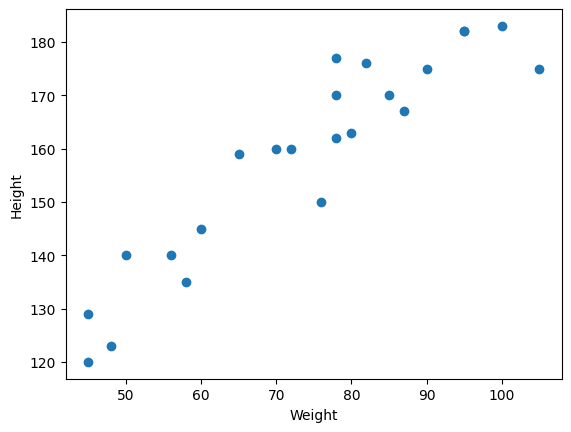

In [3]:

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

### Correlation

In [4]:

print(df.corr())

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


### Seaborn pairplot for visualization

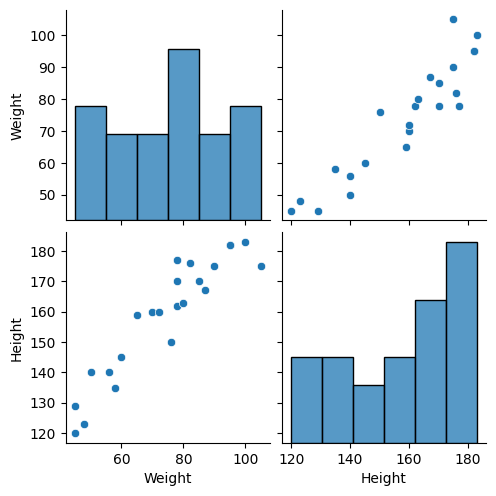

In [5]:

sns.pairplot(df)
plt.show()


### Independent and dependent features


In [6]:
X = df[['Weight']]  # Independent features should be in 2D array or dataframe format 
Y = df['Height']    # Dependent features can be in 1D array or series format


### Train Test Split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (17, 1)


### Standardization

In [8]:

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
print("X_test after standardization:", X_test)

X_test after standardization: [[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


### Apply Simple Linear Regression

In [9]:

regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, Y_train)

print("Coefficient or slope: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


### Plot the training set and plot the regression line

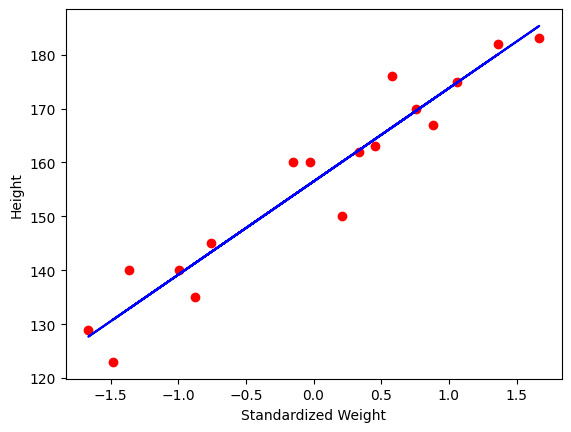

In [10]:

plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.show()

### Predict the test set

In [11]:

y_pred = regressor.predict(X_test)

### Performance Metrics 

In [12]:

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred) 
rmse = np.sqrt(mse)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Absolute Error:  9.665125886795005
Mean Squared Error:  114.84069295228699
Root Mean Squared Error:  10.716374991212605


### R2 Score  and Adjusted R2 Score

In [13]:
score = r2_score(Y_test, y_pred)
print("R2 Score: ", score)


adjusted_r2 = 1 - (1-score) * (len(Y_test)-1) / (len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score: ", adjusted_r2)

R2 Score:  0.7360826717981276
Adjusted R2 Score:  0.6701033397476595


## OLS Linear Regression
 Adding a constant term for the intercept

In [27]:
import statsmodels.api as sm

### Fit the model using OLS

In [28]:
model = sm.OLS(Y_train, X_train).fit()

In [29]:
predicition = model.predict(X_test)
print(predicition)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


### Summary of the model

In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 27 Dec 2024   Prob (F-statistic):                       0.664
Time:                        03:33:14   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\arohf\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


### Predicition for New data

In [31]:
regressor.predict(scalar.transform(([[72]])))

c:\Users\arohf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

### Performance metrics for OLS

In [32]:
mae_ols = mean_absolute_error(Y_test, y_pred_ols)
mse_ols = mean_squared_error(Y_test, y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(Y_test, y_pred_ols)

print("OLS Mean Absolute Error:", mae_ols)
print("OLS Mean Squared Error:", mse_ols)
print("OLS Root Mean Squared Error:", rmse_ols)
print("OLS R2 Score:", r2_ols)


OLS Mean Absolute Error: 9.665125886795002
OLS Mean Squared Error: 114.8406929522868
OLS Root Mean Squared Error: 10.716374991212598
OLS R2 Score: 0.736082671798128
